## <b> Importation des bibliothèques et fonctions communes

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

from math import sqrt
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import fetch_lfw_pairs
from timeit import default_timer as timer
from sklearn.metrics import accuracy_score

#Calcul distance
def distance (a, b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 )

#fonction_KKN
import operator
def knn_projet(k, x, a,classesList):
    classe_x=[]
    classesList=list(classesList)
    for j in x:
        dic=dict(zip([(distance(a[i],j),i) for i in range(len(a))],classesList))
        distances=[i for i in dic]
        distances.sort()
        classe_k=[dic[distances[i]] for i in range(k)]
        MM=Counter(classe_k).most_common(1)
        classe_x.append(MM[0][0])
    return classe_x

def accuracy(y_test,y_predict):
    cor = 0
    for i in range(len(y_predict)):
        if y_predict[i] == y_test.iloc[i]:
            cor= cor+1
    accuracy = float(cor)/len(y_predict)*100 
    return accuracy


## <b> Pour LOAD_IRIS
comparaison de la justesse:  KKN projet est la meilleure
    
comparaison du temps d'éxcution: la méthode scikit learn est la meilleure

In [147]:
#données iris 
iris=load_iris()
df= pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
classesList=df.loc[:,"target"]
x_iris=df.loc[:,"petal length (cm)"]
y_iris=df.loc[:,"petal width (cm)"]
a=list(zip(x_iris,y_iris))

#round pour prendre la partie entière de 80% de la longeur de a.
n=round(len(a)*0.8)

#n//19 pour prendre juste 20 cas de k
pas=n//19

X_train, X_test, y_train, y_test = train_test_split( a, classesList, test_size=0.2, random_state=0, stratify=classesList)

for i in range(1,n,pas):
    print("iris data:")
    print('for k=' + str(i))
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    debut1=timer()
    knnmodel.fit(X_train,y_train)
    y_predict1=knnmodel.predict(X_test)
    fin1=timer()
    print("time duration for scikit model:", fin1-debut1)
    debut2=timer()
    y_predict2=knn_projet(i,X_test,X_train,y_train)
    fin2=timer()
    print("time duration for KNN projet:", fin2-debut2)
    acc1=accuracy(y_test,y_predict1)
    acc2=accuracy(y_test,y_predict2)
    print('accuray for scikit',acc1,'%')
    print('accuray for projet',acc2,'%')
    print('--------------------------------')

    

iris data:
for k=1
time duration for scikit model: 0.0035967000003438443
time duration for KNN projet: 0.006294700000580633
accuray for scikit 100.0 %
accuray for projet 100.0 %
--------------------------------
iris data:
for k=7
time duration for scikit model: 0.00574639999831561
time duration for KNN projet: 0.006336800001008669
accuray for scikit 100.0 %
accuray for projet 100.0 %
--------------------------------
iris data:
for k=13
time duration for scikit model: 0.004404299997986527
time duration for KNN projet: 0.005017499999667052
accuray for scikit 100.0 %
accuray for projet 100.0 %
--------------------------------
iris data:
for k=19
time duration for scikit model: 0.0062840000027790666
time duration for KNN projet: 0.004907399998046458
accuray for scikit 100.0 %
accuray for projet 100.0 %
--------------------------------
iris data:
for k=25
time duration for scikit model: 0.004346000001532957
time duration for KNN projet: 0.0057239999987359624
accuray for scikit 100.0 %
accur

## <b> Comment choisir la valeur de K?

In [148]:
Ks=50
mean_acc=np.zeros((Ks-1))

for n in range(2,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    
print(mean_acc)
print( "la meilleure justesse est", mean_acc.max(), "avec une valeur de k=", mean_acc.argmax()+1) 

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
la meilleure justesse est 1.0 avec une valeur de k= 2


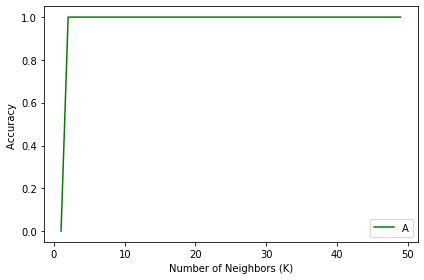

In [149]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## <b> Pour Cancer Data
    
    comparaison de la justesse: les deux méthodes ont la meme justesse (pour k=24 la méthode projet est la meilleure)
    
    comparaison du temps d'éxcution; la méthode scikit learn est la meileure

In [152]:
#Cancer
cancer=load_breast_cancer()
dfcancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfcancer['target']= cancer.target
x_cancer=dfcancer.loc[:,"mean area"]
y_cancer=dfcancer.loc[:,"mean compactness"]
classesList_cancer=dfcancer.loc[:,"target"]
a_cancer=list(zip(x_cancer,y_cancer))
n_cancer=round(len(a_cancer)*0.8)
pas_cancer=n_cancer//19



X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split( a_cancer, classesList_cancer, test_size=0.2, random_state=150,  stratify=classesList_cancer)

for i in range(1,n_cancer,pas_cancer):
    print("cancer data:")
    print('for k=' + str(i))
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    debut3=timer()
    knnmodel.fit(X_train_cancer,y_train_cancer)
    y_predict_cancer1=knnmodel.predict(X_test_cancer)
    fin3=timer()
    print("time duration for scikit model:", fin3-debut3)
    debut4=timer()
    y_predict_cancer2=knn_projet(i,X_test_cancer,X_train_cancer,y_train_cancer)
    fin4=timer()
    print("time duration for KNN projet:", fin4-debut4)
    acc1c=accuracy(y_test_cancer,y_predict_cancer1)
    acc2c=accuracy(y_test_cancer,y_predict_cancer2)
    print('accuray for scikit',acc1c,'%')
    print('accuray for projet',acc2c,'%')
    print('--------------------------------')

cancer data:
for k=1
time duration for scikit model: 0.005522100000234786
time duration for KNN projet: 0.08320140000068932
accuray for scikit 86.8421052631579 %
accuray for projet 86.8421052631579 %
--------------------------------
cancer data:
for k=24
time duration for scikit model: 0.008486900002026232
time duration for KNN projet: 0.08613880000120844
accuray for scikit 89.47368421052632 %
accuray for projet 90.35087719298247 %
--------------------------------
cancer data:
for k=47
time duration for scikit model: 0.008636100003059255
time duration for KNN projet: 0.0824765000033949
accuray for scikit 90.35087719298247 %
accuray for projet 90.35087719298247 %
--------------------------------
cancer data:
for k=70
time duration for scikit model: 0.008291199999803212
time duration for KNN projet: 0.07269590000214521
accuray for scikit 90.35087719298247 %
accuray for projet 90.35087719298247 %
--------------------------------
cancer data:
for k=93
time duration for scikit model: 0.0068

## <b> Pour lwf_pairs Data
    
    comparaison de la justesse: la méthode scikit learn est la meilleure
    
    comparaison du temps d'éxcution: la méthode scikit learn est la meileure

In [151]:
f=fetch_lfw_pairs()
dff = pd.DataFrame(f.data)
dff['target']= f.target
xf=dff.loc[:,1]
yf=dff.loc[:,2]
classe=dff.loc[:,"target"]

af=list(zip(xf,yf))
nf=round(len(af)*0.8)
pasf=nf//19

X_trainf, X_testf, y_trainf, y_testf = train_test_split( af, classe, test_size=0.2, random_state=0,  stratify=classe)

for i in range(1,nf,pasf):
    print("lwf_pairs data:")
    print('for k=' + str(i))
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    debut5=timer()
    knnmodel.fit(X_trainf,y_trainf)
    y_predictf1=knnmodel.predict(X_testf)
    fin5=timer()
    print("time duration for scikit model:", fin5-debut5)
    debut6=timer()
    y_predictf2=knn_projet(i,X_testf,X_trainf,y_trainf)
    fin6=timer()
    print("time duration for KNN projet:", fin6-debut6)
    acc1f=accuracy(y_testf,y_predictf1)
    acc2f=accuracy(y_testf,y_predictf2)
    print('accuray for scikit',acc1f,'%')
    print('accuray for projet',acc2f,'%')
    print('--------------------------------')

lwf_pairs data:
for k=1
time duration for scikit model: 0.01694590000261087
time duration for KNN projet: 1.225308799999766
accuray for scikit 55.45454545454545 %
accuray for projet 54.77272727272727 %
--------------------------------
lwf_pairs data:
for k=93
time duration for scikit model: 0.0243226999991748
time duration for KNN projet: 1.3082873999992444
accuray for scikit 45.0 %
accuray for projet 45.0 %
--------------------------------
lwf_pairs data:
for k=185
time duration for scikit model: 0.03816420000293874
time duration for KNN projet: 1.34068169999955
accuray for scikit 46.590909090909086 %
accuray for projet 46.590909090909086 %
--------------------------------
lwf_pairs data:
for k=277
time duration for scikit model: 0.05008380000072066
time duration for KNN projet: 1.3809646000008797
accuray for scikit 47.5 %
accuray for projet 47.5 %
--------------------------------
lwf_pairs data:
for k=369
time duration for scikit model: 0.05133589999968535
time duration for KNN proje